# Planetary Orbits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Problem Statement

How does a planet move around a star under the force of gravity?

## Variables and Parameters

| Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: |
| position of planet in $x$-direction | $x$ | L | dependent variable |
| position of planet in $y$-direction | $y$ | L | dependent variable |
| time | $t$ | T | independent variable |
| mass of the planet | $m_p$ | M | parameter |
| mass of the star | $m_s$ | M | parameter |
| gravitational constant | $G$ | L<sup>3</sup>T<sup>-2</sup>M<sup>-1</sup> | parameter |

## Assumptions and Constraints

* planet moves in the $xy$-plane only
* the position of the star is fixed at the origin
* no drag, friction or damping
* planet starts on the $x$-axis at $y(0) = 0$
* planet starts with velocity in $y$-direction only, $x'(0) = 0$

## Model Construction

The unit vector that points from the planet to the star is

$$
\left( -\frac{x}{\sqrt{x^2 + y^2}} , -\frac{y}{\sqrt{x^2 + y^2}} \right)
$$

The gravitational force vector acting on the planet is given by

$$
\mathbf{F} = \frac{Gm_pm_s}{x^2 + y^2} \left( -\frac{x}{\sqrt{x^2 + y^2}} , -\frac{y}{\sqrt{x^2 + y^2}} \right)
$$

Apply Newton's second law of motion to get a second order, 2-dimenisional, nonlinear system of differential equations

$$
\begin{align*}
m_p \frac{d^2x}{dt^2} &= -\frac{G m_p m_s x}{\left( x^2 + y^2 \right)^{3/2}} \\
m_p \frac{d^2y}{dt^2} &= -\frac{G m_p m_s y}{\left( x^2 + y^2 \right)^{3/2}}
\end{align*}
$$

with initial conditions

$$
x(0) = x_0 \ , \ \ y(0) = 0 \ , \ \ x'(0) = v_{x,0} \ , \ \ y'(0) = v_{y,0} \ , \ \ 
$$

Apply nondimensionalization procedure. Let $x = [x]x^*$, $y = [y]y^*$ and $t = [t]t^*$. The symmetry of the equations suggests that we should choose the same scaling factor $[c] = [x] = [y]$ for $x$ and $y$. Make the substitutions

$$
\begin{align*}
\frac{[c]}{[t]^2} \frac{d^2x^*}{dt^{*2}} &= -\frac{G m_s [c]x^*}{[c]^3 \left( x^{*2} + y^{*2} \right)^{3/2}} \\
\frac{[c]}{[t]^2} \frac{d^2y^*}{dt^{*2}} &= -\frac{G m_s [c]y^*}{[c]^3 \left( x^{*2} + y^{*2} \right)^{3/2}} \\
[c]x^*(0) &= x_0 \ , \ \ [c]y^*(0) = 0 \\
\frac{[c]}{[t]} \frac{dx^*}{dt^*}(0) &= 0 \ , \ \ \frac{[c]}{[t]} \frac{dy^*}{dt^*}(0) = v_{y,0}
\end{align*}
$$

Divide by highest order term and simplify

$$
\begin{align*}
\frac{d^2x^*}{dt^{*2}} &= -\frac{G m_s [t]^2 x^*}{[c]^3 \left( x^{*2} + y^{*2} \right)^{3/2}} \\
\frac{d^2y^*}{dt^{*2}} &= -\frac{G m_s [t]^2y^*}{[c]^3 \left( x^{*2} + y^{*2} \right)^{3/2}} \\
x^*(0) &= \frac{x_0}{[c]} \ , \ \ y^*(0) = 0 \\
\frac{dx^*}{dt^*}(0) &= 0 \ , \ \ \frac{dy^*}{dt^*}(0) = \frac{[t]}{[c]} v_{y,0}
\end{align*}
$$

There are several choices we can make and so we choose

$$
[c] = x_0 \hspace{10mm} \text{and} \hspace{10mm} [t] = \frac{x_0^{3/2}}{\sqrt{Gm_s}}
$$

and we get

$$
\begin{align*}
\frac{d^2x^*}{dt^{*2}} &= -\frac{x^*}{\left( x^{*2} + y^{*2} \right)^{3/2}} \\
\frac{d^2y^*}{dt^{*2}} &= -\frac{y^*}{\left( x^{*2} + y^{*2} \right)^{3/2}} \\
x^*(0) &= 1 \ , \ \ y^*(0) = 0 \\
\frac{dx^*}{dt^*}(0) &= 0 \ , \ \ \frac{dy^*}{dt^*}(0) = v_{y,0} \sqrt{\frac{x_0}{Gm_s}}
\end{align*}
$$

Introduce new variables $u_0 = x^*$, $u_1 = \frac{dx}{dt^*}$, $u_2 = y$, and $u_3 = \frac{dy}{dt^*}$ to find

$$
\begin{align*}
\frac{du_0}{dt^*} &= u_1 \\
\frac{du_1}{dt^*} &= -\frac{u_0}{\left( u_0^2 + u_2^2 \right)^{3/2}} \\
\frac{du_2}{dt^*} &= u_3 \\
\frac{du_3}{dt^*} &= -\frac{u_2}{\left( u_0^2 + u_2^2 \right)^{3/2}}
\end{align*}
$$

Plot some trajectories!

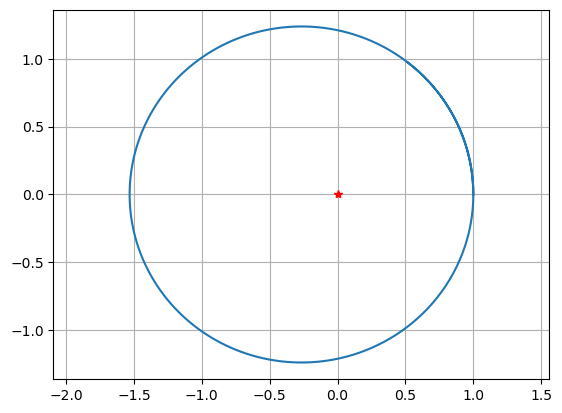

In [56]:
def f(u,t):
    dudt = np.array([0.,0.,0.,0.])
    d3 = np.sqrt(u[0]**2 + u[2]**2)**3
    dudt[0] = u[1]
    dudt[1] = -u[0]/d3
    dudt[2] = u[3]
    dudt[3] = -u[2]/d3
    return dudt

u0 = [1.,0.,0.,1.1]
t = np.linspace(0,10,200)
u = spi.odeint(f,u0,t)

plt.plot(u[:,0],u[:,2],0,0,'r*'), plt.grid(True), plt.axis('equal')
plt.show()

## Analysis

*Under construction*